In [1]:
import sys
sys.path.insert(0, '/Users/lunderman/Documents/GitHub/LMP19')
import LMP19
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF,WhiteKernel

In [2]:
gamma = [-1,-1]
func = LMP19.Models.FuQu(gamma).eval

In [3]:
lb , ub = [-10,-10],[10,10]
bounds = np.array([lb,ub]).T
dt = 0.1

xx_mesh = np.meshgrid(np.arange(lb[0],ub[0],dt),np.arange(lb[1],ub[1],dt))
xx = np.vstack([xx_mesh[0].ravel(), xx_mesh[1].ravel()])
yy = func(xx).reshape((200,200))

In [4]:
nPts = 5
X = np.random.uniform(lb,ub,(nPts,2))
y = func(X).reshape((nPts,1))

In [5]:
GBO = LMP19.GBO(func,2,X,y,bounds)

kernel = 1.0**2*RBF(np.max(np.diag(np.cov(X.T))))+1.0**2*WhiteKernel(np.std(y))
GP = GPR(kernel = kernel,normalize_y=False,n_restarts_optimizer=50).fit(X,y)

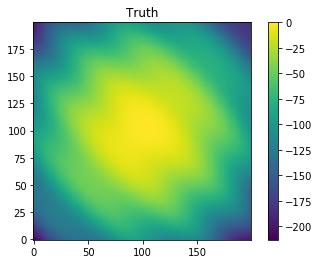

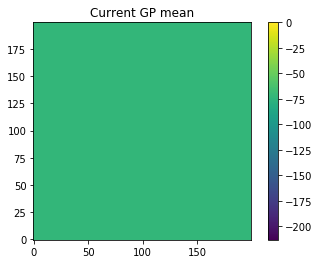

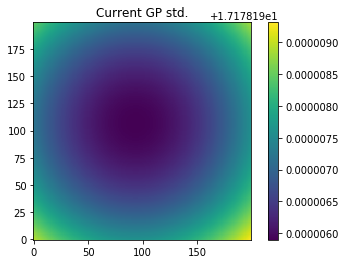

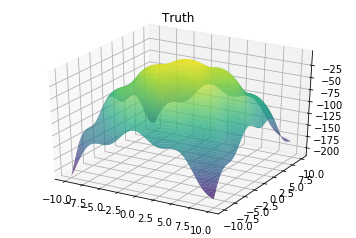

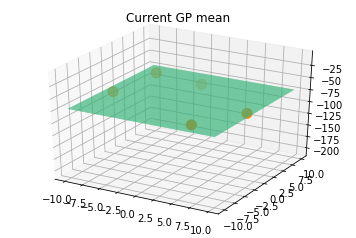

In [6]:
Y,std = GP.predict(xx.T,return_std=True)
Y = Y.reshape((200,200))
std = std.reshape((200,200))

vmin ,vmax = np.min(yy),np.max(yy)
plt.imshow(yy,origin='lower',vmin=vmin,vmax=vmax)
plt.colorbar()
plt.title('Truth')
plt.show()
plt.imshow(Y,origin='lower',vmin=vmin,vmax=vmax)
plt.colorbar()
plt.title('Current GP mean')
plt.show()
plt.imshow(std,origin='lower')
plt.colorbar()
plt.title('Current GP std.')
plt.show()

ax = plt.axes(projection='3d')
ax.plot_surface(xx_mesh[0], xx_mesh[1], yy, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none',vmin=vmin,vmax=vmax)
plt.title('Truth')
plt.show()
ax = plt.axes(projection='3d')
ax.plot_surface(xx_mesh[0], xx_mesh[1], Y, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none',vmin=vmin,vmax=vmax)
ax.set_zlim(vmin,vmax)
ax.scatter3D(X[:,0],X[:,1],y,color='C1',s=100)
plt.title('Current GP mean')
plt.show()

In [7]:
nSteps = 10
for kk in range(nSteps):
    GBO.GP = GP
    GBO.Expected_Improvement()
#    if kk%10 ==0: print(kk)

Step  0
      Selected EI Maximizer:  [-6.87980052 -7.75254282] 0.6680907240222824
 Current function maximizer:  [-5.72060345  3.3423923 ] -48.59703122633771


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/lunderman/Documents/GitHub/LMP19/LMP19/Estimation/GBO.py:42: RuntimeWarning: divide by zero encountered in true_divide
  return(-(((mu_x - f_star)*norm.cdf((mu_x-f_star)/std_x)+
/Users/lunderman/Documents/GitHub/LMP19/LMP19/Estimation/GBO.py:43: RuntimeWarning: divide by zero encountered in true_divide
  std_x*norm.pdf((mu_x-f_star)/std_x))[0,0]))


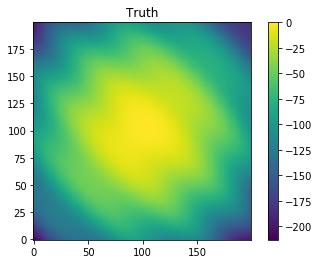

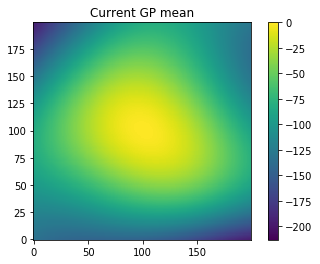

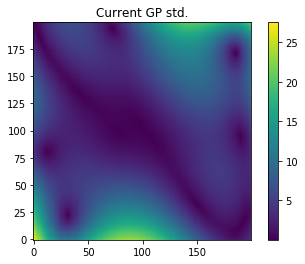

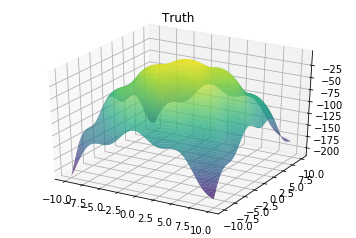

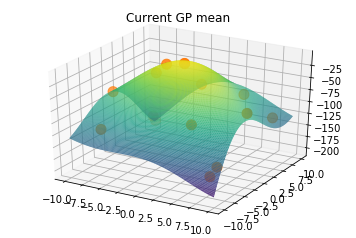

In [9]:
Y,std = GP.predict(xx.T,return_std=True)
Y = Y.reshape((200,200))
std = std.reshape((200,200))

vmin ,vmax = np.min(yy),np.max(yy)
plt.imshow(yy,origin='lower',vmin=vmin,vmax=vmax)
plt.colorbar()
plt.title('Truth')
plt.show()
plt.imshow(Y,origin='lower',vmin=vmin,vmax=vmax)
plt.colorbar()
plt.title('Current GP mean')
plt.show()
plt.imshow(std,origin='lower')
plt.colorbar()
plt.title('Current GP std.')
plt.show()

ax = plt.axes(projection='3d')
ax.plot_surface(xx_mesh[0], xx_mesh[1], yy, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none',vmin=vmin,vmax=vmax)
plt.title('Truth')
plt.show()
ax = plt.axes(projection='3d')
ax.plot_surface(xx_mesh[0], xx_mesh[1], Y, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none',vmin=vmin,vmax=vmax)
ax.set_zlim(vmin,vmax)
ax.scatter3D(GBO.X[:,0],GBO.X[:,1],GBO.y,color='C1',s=100)
plt.title('Current GP mean')
plt.show()

In [14]:
GBO.GP.kernel_

160**2 * RBF(length_scale=10.1) + 0.00597**2 * WhiteKernel(noise_level=2.21e-05)

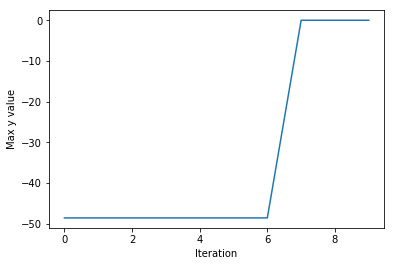

In [10]:
plt.plot(np.arange(nSteps),[np.max(GBO.y[:nPts+kk,0]) for kk in range(nSteps)])
plt.ylabel('Max y value')
plt.xlabel('Iteration')
plt.show()